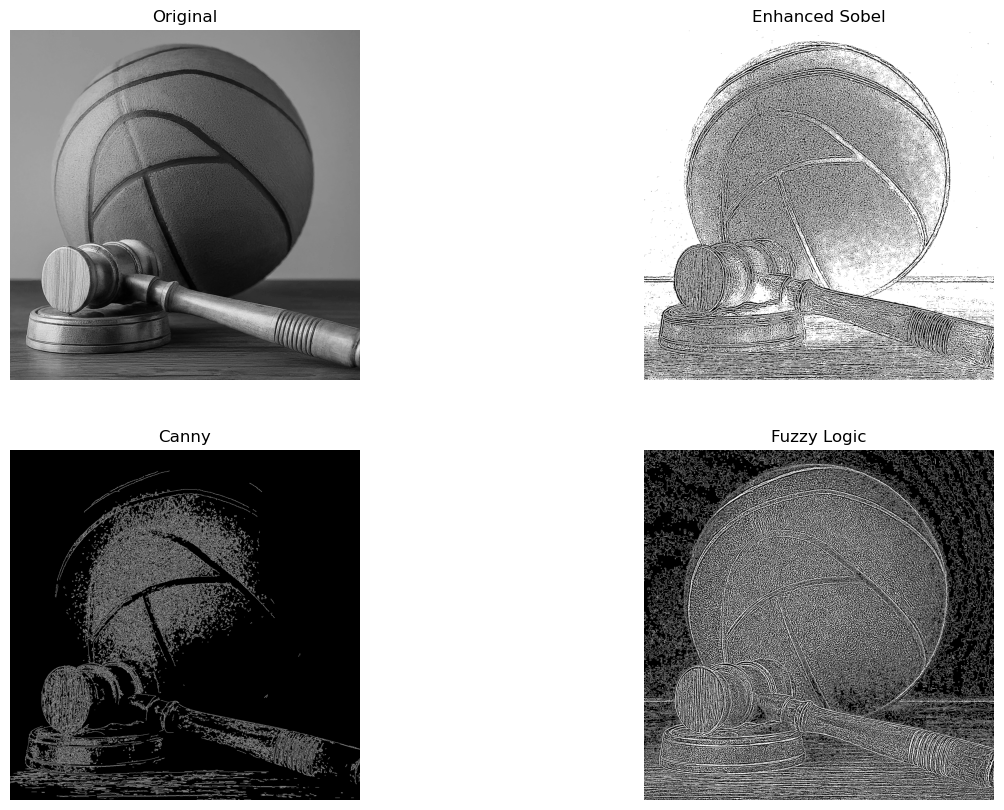

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\\Users\\Shivam 007\\Downloads\\Sports Law.jpeg"  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Function to display images
def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(2, len(images) // 2, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Enhanced Sobel Edge Detection
def enhanced_sobel(image):
    # Apply Gaussian Blur to reduce noise before edge detection
    blurred = cv2.GaussianBlur(image, (5, 5), 1.5)

    # Apply Sobel filters
    sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)

    # Compute magnitude and angle
    sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)
    sobel_angle = cv2.phase(sobel_x, sobel_y, angleInDegrees=True)

    # Normalize to the range 0-255
    sobel_normalized = cv2.normalize(sobel_magnitude, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Adaptive Thresholding to enhance edge visibility
    sobel_edges = cv2.adaptiveThreshold(np.uint8(sobel_normalized), 255,
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY, 11, 2)
    return sobel_edges

# Perform enhanced Sobel edge detection
sobel_edges = enhanced_sobel(image)

# 2. Canny Edge Detection for comparison
canny_edges = cv2.Canny(image, 200, 100)

# 5. Fuzzy Logic Edge Detection
def fuzzy_edge_detection(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 1.5)
    edges = cv2.Laplacian(blurred, cv2.CV_64F)
    fuzzy_edges = np.where(edges > np.mean(edges), 255, 0).astype(np.uint8)
    return fuzzy_edges


fuzzy_edges = fuzzy_edge_detection(image)

# Display results
images = [image, sobel_edges, canny_edges, fuzzy_edges]
titles = ['Original', 'Enhanced Sobel', 'Canny', 'Fuzzy Logic']
display_images(images, titles)
